# 1. Importing necessary libararies.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from IPython.display import display
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from ipywidgets import interact,FloatSlider,Layout
from scipy.optimize import fsolve

# 2. Function definitions used for defining the system of ordinary differential equations and as per the requirements.

In [2]:
def smoking(state,t,beta,mu,alpha,sigma,gamma,p):
    s,q,a = state  # Unpack the state vector.
    dsdt = beta*s*(1-s-q-a) - alpha*s*a + sigma*q*s - mu*s
    dqdt = alpha*s*a - sigma*q*s - gamma*q - mu*q
    dadt = mu*p - mu*a + q*gamma
    return [dsdt, dqdt, dadt]

In [3]:
def system_equations(state, beta, mu, alpha, sigma, gamma, p):
    s,q,a = state
    dsdt = beta*s*(1-s-q-a) - alpha*s*a + sigma*q*s - mu*s
    dqdt = alpha*s*a - sigma*q*s - gamma*q - mu*q
    dadt = mu*p - mu*a + q*gamma
    return [dsdt, dqdt, dadt]

# 3. Finding endemic equilibrium using odeint! Analysis for R = 1.593088.

In [4]:
beta = 0.7
mu = 0.12
alpha = 0.5
sigma = 0.01
gamma = 0.042
p = 0.34

# Time points for integration
t = np.linspace(0, 1000, 10000)  # Extend the integration time

# Range of initial conditions (s, q, a) with s + q + a < 1
initial_conditions = [(s, q, a) for s in np.linspace(0.01, 1.0, 10) for q in np.linspace(0.01, 1.0, 10) for a in np.linspace(0.01, 1.0, 10) if s + q + a < 1]

# Find endemic equilibrium for each initial condition
for initial_condition in initial_conditions:
    state = odeint(smoking, initial_condition, t, args=(beta, mu, alpha, sigma, gamma, p))
    s_end = state[-1, 0]
    q_end = state[-1, 1]
    a_end = state[-1, 2]
    print(f'Initial Condition: (s, q, a) = {initial_condition} --> Endemic Equilibrium Values (s, q, a) = ({s_end}, {q_end}, {a_end})')

Initial Condition: (s, q, a) = (0.01, 0.01, 0.01) --> Endemic Equilibrium Values (s, q, a) = (0.08695637557402618, 0.1001176009887691, 0.375041160346083)
Initial Condition: (s, q, a) = (0.01, 0.01, 0.12) --> Endemic Equilibrium Values (s, q, a) = (0.08695637557400217, 0.10011760098838757, 0.37504116034595525)
Initial Condition: (s, q, a) = (0.01, 0.01, 0.23) --> Endemic Equilibrium Values (s, q, a) = (0.08695637557394773, 0.10011760098925537, 0.37504116034630325)
Initial Condition: (s, q, a) = (0.01, 0.01, 0.34) --> Endemic Equilibrium Values (s, q, a) = (0.0869563755740053, 0.10011760098935323, 0.37504116034630897)
Initial Condition: (s, q, a) = (0.01, 0.01, 0.45) --> Endemic Equilibrium Values (s, q, a) = (0.086956375574009, 0.10011760098933062, 0.3750411603462987)
Initial Condition: (s, q, a) = (0.01, 0.01, 0.56) --> Endemic Equilibrium Values (s, q, a) = (0.08695637557402977, 0.10011760098942202, 0.3750411603463214)
Initial Condition: (s, q, a) = (0.01, 0.01, 0.67) --> Endemic Equi

# 4. Global Stability Plot.

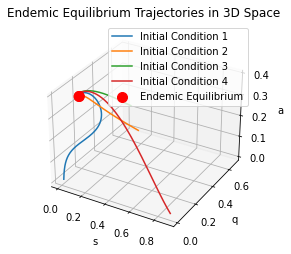

Initial Condition 1 --> s(t):0.086956376, q(t):0.100117601, a(t):0.375041160
Initial Condition 2 --> s(t):0.086956376, q(t):0.100117601, a(t):0.375041160
Initial Condition 3 --> s(t):0.086956376, q(t):0.100117601, a(t):0.375041160
Initial Condition 4 --> s(t):0.086956376, q(t):0.100117601, a(t):0.375041160


In [11]:
beta = 0.7
mu = 0.12
alpha = 0.5
sigma = 0.01
gamma = 0.042
p = 0.34

# Time points for integration
t = np.linspace(0, 1000, 10000)  # Extend the integration time

# Four initial conditions spanning the 3D space, each labeled
initial_conditions = [
    (0.01, 0.01, 0.01, "Initial Condition 1"),
    (0.12, 0.67, 0.01, "Initial Condition 2"),
    (0.23, 0.45, 0.23, "Initial Condition 3"),
    (0.89, 0.01, 0.01, "Initial Condition 4")
]

# Lists to store endemic equilibrium values
s_endemic = []
q_endemic = []
a_endemic = []

# Find endemic equilibrium for each initial condition and store the trajectories
trajectories = []

for initial_condition in initial_conditions:
    state = odeint(smoking, initial_condition[:3], t, args=(beta, mu, alpha, sigma, gamma, p))
    s_endemic.append(state[-1, 0])
    q_endemic.append(state[-1, 1])
    a_endemic.append(state[-1, 2])
    trajectories.append((state, initial_condition[3]))

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot endemic equilibrium values
ax.scatter(s_endemic, q_endemic, a_endemic, c='r', marker='o', s=100, label='Endemic Equilibrium')

# Plot trajectories
for trajectory, label in trajectories:
    s = trajectory[:, 0]
    q = trajectory[:, 1]
    a = trajectory[:, 2]
    ax.plot(s, q, a, label=label)
    
# Print equilibrium values on the plot
#for i in range(4):
    #ax.text(s_endemic[i], q_endemic[i], a_endemic[i], f'({s_endemic[i]:.3f}, {q_endemic[i]:.3f}, {a_endemic[i]:.3f})', fontsize=12, color='b')    

# Set axis labels
ax.set_xlabel('s')
ax.set_ylabel('q')
ax.set_zlabel('a')

# Title and legend
ax.set_title('Endemic Equilibrium Trajectories in 3D Space')
ax.legend()
plt.show()
for i in range(4):
    print(f'Initial Condition {i+1} --> s(t):{s_endemic[i]:.9f}, q(t):{q_endemic[i]:.9f}, a(t):{a_endemic[i]:.9f}')

# 5. s(t) vs t for various params (beta, sigma, alpha).

### 5a). s(t) vs t for various values of beta.

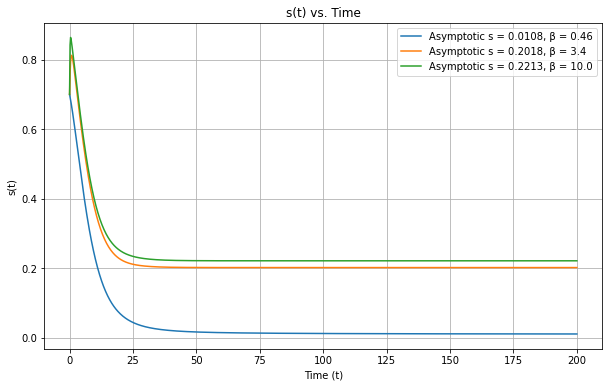

In [12]:
mu = 0.12
alpha = 0.5
sigma = 0.01
gamma = 0.042
p = 0.34
t = np.linspace(0, 200, 1000)  # Time span
initial_state = [0.7, 0.05, 0.05]  # [s0, q0, a0]

# Different beta values
beta_values = [0.46, 3.4, 10.0]

plt.figure(figsize=(10, 6))
for beta in beta_values:
    result = odeint(smoking, initial_state, t, args=(beta, mu, alpha, sigma, gamma, p))
    s_values = result[:, 0]  # Extract s(t) values
    asymptotic_s = s_values[-1]  # Asymptotic value of s

    plt.plot(t, s_values, label=f'Asymptotic s = {asymptotic_s:.4f}, β = {beta}')

# Customize the plot
plt.xlabel('Time (t)')
plt.ylabel('s(t)')
plt.title('s(t) vs. Time')
plt.legend()
plt.grid(True)
plt.show()

### 5b). s(t) vs t for various values of sigma.

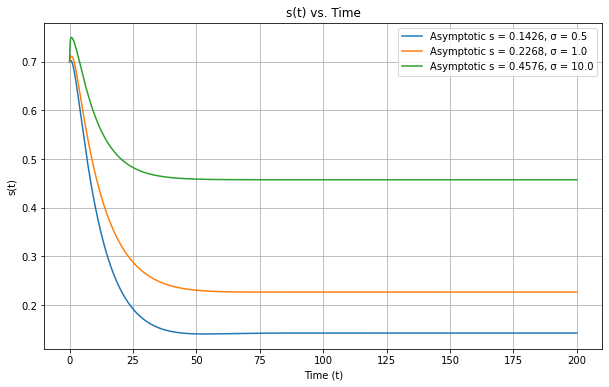

In [13]:
mu = 0.12
alpha = 0.5
gamma = 0.042
p = 0.34
beta = 0.7  

# Time points for integration
t = np.linspace(0, 200, 1000)

# Different values of sigma
sigma_values = [0.5, 1.0, 10.0]

plt.figure(figsize=(10, 6))
for sigma in sigma_values:
    result = odeint(smoking, [0.7, 0.05, 0.05], t, args=(beta, mu, alpha, sigma, gamma, p))
    s_values = result[:, 0]  # Extract s(t) values
    asymptotic_s = s_values[-1]  # Asymptotic value of s

    plt.plot(t, s_values, label=f'Asymptotic s = {asymptotic_s:.4f}, σ = {sigma}')

# Customize the plot
plt.xlabel('Time (t)')
plt.ylabel('s(t)')
plt.title('s(t) vs. Time')
plt.legend()
plt.grid(True)
plt.show()

### 5c). s(t) vs t for various values of alpha.

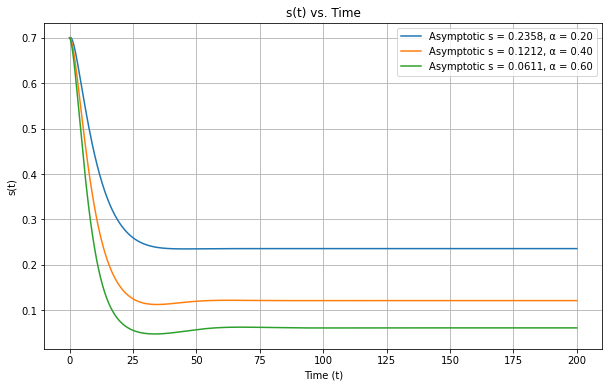

In [14]:
mu = 0.12
sigma = 0.01
gamma = 0.042
p = 0.34
beta = 0.7
alpha_values = [0.2, 0.4, 0.6] 

# Time points for integration
t = np.linspace(0, 200, 1000)

plt.figure(figsize=(10, 6))
for alpha in alpha_values:
    result = odeint(smoking, [0.7, 0.05, 0.05], t, args=(beta, mu, alpha, sigma, gamma, p))
    s_values = result[:, 0]  # Extract s(t) values
    asymptotic_s = s_values[-1]  # Asymptotic value of s
    
    plt.plot(t, s_values, label=f'Asymptotic s = {asymptotic_s:.4f}, α = {alpha:.2f}')

# Customize the plot
plt.xlabel('Time (t)')
plt.ylabel('s(t)')
plt.title('s(t) vs. Time')
plt.legend()
plt.grid(True)
plt.show()

# 6. q(t) vs t for various params (beta, sigma, alpha).

### 6a). q(t) vs t for various values of beta.

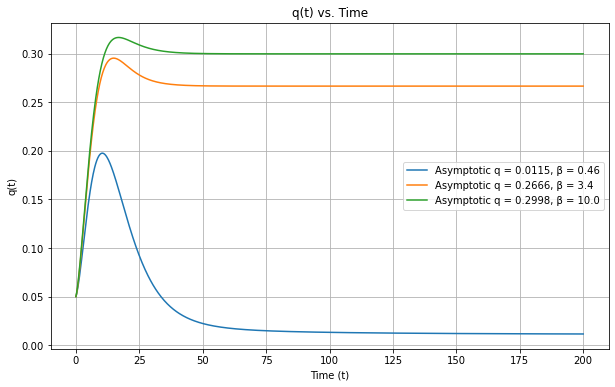

In [15]:
mu = 0.12
alpha = 0.5
sigma = 0.01
gamma = 0.042
p = 0.34
t = np.linspace(0, 200, 1000)  # Time span

# Initial conditions
initial_state = [0.7, 0.05, 0.05]  # [s0, q0, a0]

# Different beta values
beta_values = [0.46, 3.4, 10.0]

plt.figure(figsize=(10, 6))
for beta in beta_values:
    result = odeint(smoking, initial_state, t, args=(beta, mu, alpha, sigma, gamma, p))
    q_values = result[:, 1]  # Extract q(t) values
    asymptotic_q = q_values[-1]  # Asymptotic value of s
    
    plt.plot(t, q_values, label=f'Asymptotic q = {asymptotic_q:.4f}, β = {beta}')

# Customize the plot
plt.xlabel('Time (t)')
plt.ylabel('q(t)')
plt.title('q(t) vs. Time')
plt.legend()
plt.grid(True)
plt.show()

### 6b). q(t) vs t for various values of sigma.

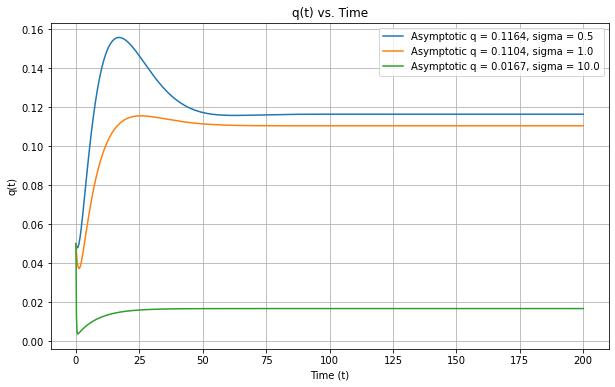

In [16]:
mu = 0.12
alpha = 0.5
gamma = 0.042
p = 0.34
beta = 0.7
t = np.linspace(0, 200, 1000)

# Different values of sigma
sigma_values = [0.5, 1.0, 10.0]

plt.figure(figsize=(10, 6))
for sigma in sigma_values:
    result = odeint(smoking, [0.7, 0.05, 0.05], t, args=(beta, mu, alpha, sigma, gamma, p))
    q_values = result[:, 1]  # Extract q(t) values
    asymptotic_q = q_values[-1]  # Asymptotic value of s
    
    plt.plot(t, q_values, label=f'Asymptotic q = {asymptotic_q:.4f}, sigma = {sigma}')

# Customize the plot
plt.xlabel('Time (t)')
plt.ylabel('q(t)')
plt.title('q(t) vs. Time')
plt.legend()
plt.grid(True)
plt.show()

### 6c). q(t) vs t for various values of alpha.

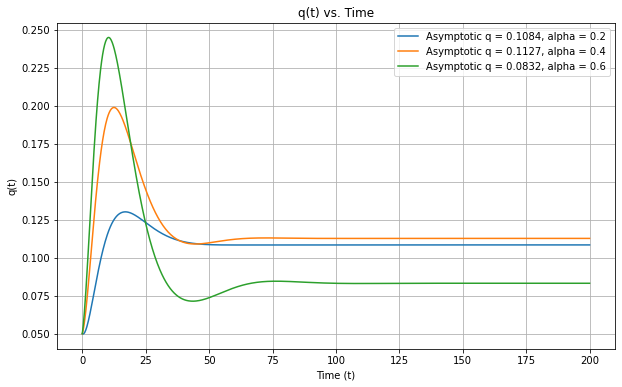

In [17]:
mu = 0.12
sigma = 0.01
gamma = 0.042
p = 0.34
beta = 0.7
t = np.linspace(0, 200, 1000)

# Different values of alpha
alpha_values = [0.2, 0.4, 0.6]

plt.figure(figsize=(10, 6))
for alpha in alpha_values:
    result = odeint(smoking, [0.7, 0.05, 0.05], t, args=(beta, mu, alpha, sigma, gamma, p))
    q_values = result[:, 1]  # Extract q(t) values
    asymptotic_q = q_values[-1]  # Asymptotic value of s
    
    plt.plot(t, q_values, label=f'Asymptotic q = {asymptotic_q:.4f}, alpha = {alpha}')
    
# Customize the plot
plt.xlabel('Time (t)')
plt.ylabel('q(t)')
plt.title('q(t) vs. Time')
plt.legend()
plt.grid(True)
plt.show()

# 7. a(t) vs t for various params (beta, sigma, alpha).

### 7a). a(t) vs t for various values of beta.

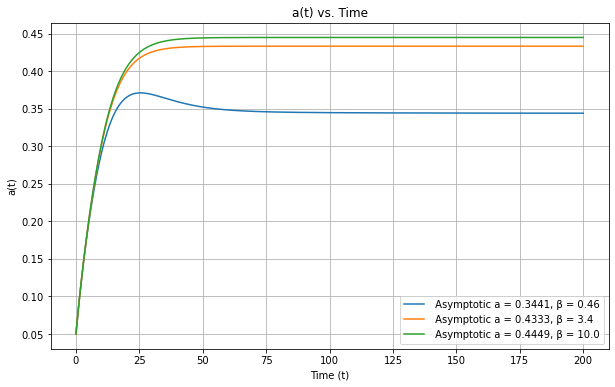

In [18]:
mu = 0.12
alpha = 0.5
sigma = 0.01
gamma = 0.042
p = 0.34
t = np.linspace(0, 200, 1000)  # Time span

# Initial conditions
initial_state = [0.7, 0.05, 0.05]  # [s0, q0, a0]

# Different beta values
beta_values = [0.46, 3.4, 10.0]

# Create a plot for each beta value
plt.figure(figsize=(10, 6))
for beta in beta_values:
    result = odeint(smoking, initial_state, t, args=(beta, mu, alpha, sigma, gamma, p))
    a_values = result[:, 2]  # Extract a(t) values
    asymptotic_a = a_values[-1]
    plt.plot(t, a_values, label=f' Asymptotic a = {asymptotic_a:.4f}, β = {beta}')

# Customize the plot
plt.xlabel('Time (t)')
plt.ylabel('a(t)')
plt.title('a(t) vs. Time')
plt.legend()
plt.grid(True)
plt.show()

### 7b). a(t) vs t for various values of sigma.

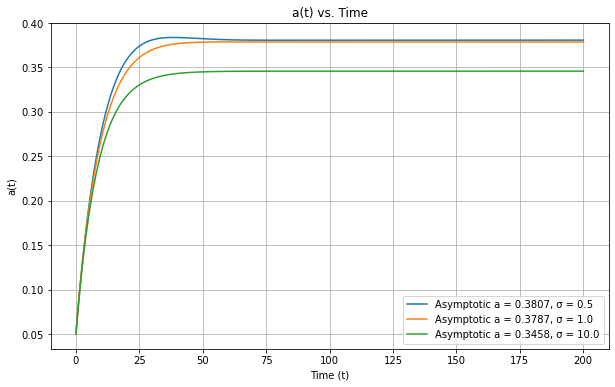

In [19]:
mu = 0.12
alpha = 0.5
gamma = 0.042
p = 0.34
beta = 0.7  

# Time points for integration
t = np.linspace(0, 200, 1000)

# Different values of sigma
sigma_values = [0.5, 1.0, 10.0]

plt.figure(figsize=(10, 6))
for sigma in sigma_values:
    result = odeint(smoking, [0.7, 0.05, 0.05], t, args=(beta, mu, alpha, sigma, gamma, p))
    a_values = result[:, 2]  # Extract s(t) values
    asymptotic_a = a_values[-1]  # Asymptotic value of s

    plt.plot(t, a_values, label=f'Asymptotic a = {asymptotic_a:.4f}, σ = {sigma}')

# Customize the plot
plt.xlabel('Time (t)')
plt.ylabel('a(t)')
plt.title('a(t) vs. Time')
plt.legend()
plt.grid(True)
plt.show()

### 7c). a(t) vs t for various values of alpha.

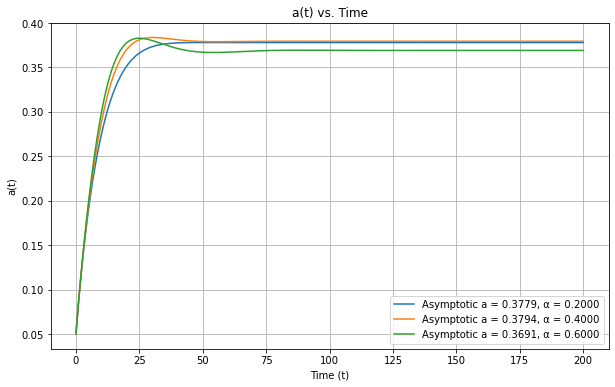

In [20]:
mu = 0.12
sigma = 0.01
gamma = 0.042
p = 0.34
beta = 0.7
alpha_values = [0.2, 0.4, 0.6] 

# Time points for integration
t = np.linspace(0, 200, 1000)

plt.figure(figsize=(10, 6))
for alpha in alpha_values:
    result = odeint(smoking, [0.7, 0.05, 0.05], t, args=(beta, mu, alpha, sigma, gamma, p))
    a_values = result[:, 2]  # Extract s(t) values
    asymptotic_a = a_values[-1]  # Asymptotic value of s
    
    plt.plot(t, a_values, label=f'Asymptotic a = {asymptotic_a:.4f}, α = {alpha:.4f}')

# Customize the plot
plt.xlabel('Time (t)')
plt.ylabel('a(t)')
plt.title('a(t) vs. Time')
plt.legend()
plt.grid(True)
plt.show()

# 8. Jacobian and Eigenvalues.

### 8a). alpha sweep.

In [21]:
from scipy.linalg import eigvals

mu = 0.12
sigma = 0.01
gamma = 0.042
p = 0.34
beta = 0.7

# Time points for integration
t = np.linspace(0, 200, 1000)

# Range of alpha values (from 0 to 1, exclusive)
alpha_values = np.linspace(0.01, 2.00, 10)

for alpha in alpha_values:
    # Integrate the system
    result = odeint(smoking, [0.7, 0.05, 0.05], t, args=(beta, mu, alpha, sigma, gamma, p))
    
    # Extract the last state as the equilibrium point
    equilibrium_point = result[-1, :]
    
    # Calculate the Jacobian matrix
    def jacobian_matrix(state, beta, mu, alpha, sigma, gamma, p):
        s,q,a = state
        dsds = -beta*s
        dsdq = -beta*s + sigma*s
        dsda = -alpha*s - beta*s
        dqds = alpha*a - sigma*q
        dqdq = -sigma*s - gamma - mu
        dqda = alpha*s
        return np.array([[dsds, dsdq, dsda], [dqds, dqdq, dqda], [0, gamma, -mu]])
    
    # Calculate the eigenvalues of the Jacobian matrix
    eigenvalues = eigvals(jacobian_matrix(equilibrium_point, beta, mu, alpha, sigma, gamma, p))
    
    print(f"Alpha = {alpha:.2f}, Eigenvalues = {eigenvalues}")
    
    # Determine stability based on the eigenvalues
    if all(np.real(eigenvalues) < 0):
        print("The equilibrium is stable (asymptotically stable).\n")
    elif all(np.real(eigenvalues) > 0):
        print("The equilibrium is unstable.\n")
    else:
        print("The stability of the equilibrium cannot be determined.\n")

Alpha = 0.01, Eigenvalues = [-0.32403685+0.j -0.17165611+0.j -0.12051443+0.j]
The equilibrium is stable (asymptotically stable).

Alpha = 0.23, Eigenvalues = [-0.12648246+0.10508714j -0.12648246-0.10508714j -0.17948746+0.j        ]
The equilibrium is stable (asymptotically stable).

Alpha = 0.45, Eigenvalues = [-0.08206904+0.10867849j -0.08206904-0.10867849j -0.19032048+0.j        ]
The equilibrium is stable (asymptotically stable).

Alpha = 0.67, Eigenvalues = [-0.06215711+0.08649854j -0.06215711-0.08649854j -0.19022382+0.j        ]
The equilibrium is stable (asymptotically stable).

Alpha = 0.89, Eigenvalues = [-0.17952942+0.j         -0.05557837+0.03152092j -0.05557837-0.03152092j]
The equilibrium is stable (asymptotically stable).

Alpha = 1.12, Eigenvalues = [-7.10361130e-06+0.j -1.62007022e-01+0.j -1.19987200e-01+0.j]
The equilibrium is stable (asymptotically stable).

Alpha = 1.34, Eigenvalues = [ 3.73237274e-11+0.j -1.62000000e-01+0.j -1.20000000e-01+0.j]
The stability of the e

### 8b). beta sweep.

In [25]:
mu = 0.12
alpha = 0.5
sigma = 0.01
gamma = 0.042
p = 0.34

# Time points for integration
t = np.linspace(0, 200, 1000)

# Range of beta values (from 0.01 to 9.99, exclusive)
beta_values = np.linspace(0.01, 9.99, 20)

for beta in beta_values:
    # Integrate the system
    result = odeint(smoking, [0.7, 0.05, 0.05], t, args=(beta, mu, alpha, sigma, gamma, p))
    
    # Extract the last state as the equilibrium point
    equilibrium_point = result[-1, :]
    
    # Calculate the Jacobian matrix
    def jacobian_matrix(state, beta, mu, alpha, sigma, gamma, p):
        s, q, a = state
        dsds = -beta*s
        dsdq = -beta*s + sigma*s
        dsda = -alpha*s - beta*s
        dqds = alpha*a - sigma*q
        dqdq = -sigma*s - gamma - mu
        dqda = alpha*s
        return np.array([[dsds, dsdq, dsda], [dqds, dqdq, dqda], [0, gamma, -mu]])
    
    # Calculate the eigenvalues of the Jacobian matrix
    eigenvalues = eigvals(jacobian_matrix(equilibrium_point, beta, mu, alpha, sigma, gamma, p))
    
    print(f"Beta = {beta:.2f}, Eigenvalues = {eigenvalues}")
    
    # Determine stability based on the eigenvalues
    if all(np.real(eigenvalues) < 0):
        print("The equilibrium is stable (asymptotically stable).\n")
    elif all(np.real(eigenvalues) > 0):
        print("The equilibrium is unstable.\n")
    else:
        print("The stability of the equilibrium cannot be determined.\n")

Beta = 0.01, Eigenvalues = [ 2.29594121e-13+0.j -1.62000000e-01+0.j -1.20000000e-01+0.j]
The stability of the equilibrium cannot be determined.

Beta = 0.54, Eigenvalues = [-0.18359667+0.j         -0.06063871+0.05404598j -0.06063871-0.05404598j]
The equilibrium is stable (asymptotically stable).

Beta = 1.06, Eigenvalues = [-0.12173649+0.16204078j -0.12173649-0.16204078j -0.18450535+0.j        ]
The equilibrium is stable (asymptotically stable).

Beta = 1.59, Eigenvalues = [-0.19007605+0.21270474j -0.19007605-0.21270474j -0.16987326+0.j        ]
The equilibrium is stable (asymptotically stable).

Beta = 2.11, Eigenvalues = [-0.25538776+0.24332409j -0.25538776-0.24332409j -0.16102556+0.j        ]
The equilibrium is stable (asymptotically stable).

Beta = 2.64, Eigenvalues = [-0.31881361+0.25830145j -0.31881361-0.25830145j -0.15583988+0.j        ]
The equilibrium is stable (asymptotically stable).

Beta = 3.16, Eigenvalues = [-0.38127789+0.25936172j -0.38127789-0.25936172j -0.15252216+0.

### 8c). sigma sweep.

In [24]:
mu = 0.12
alpha = 0.5
gamma = 0.042
p = 0.34
beta = 0.7

# Time points for integration
t = np.linspace(0, 200, 1000)

# Range of sigma values (from 0.01 to 9.99, exclusive)
sigma_values = np.linspace(0.01, 9.99, 20)

for sigma in sigma_values:
    # Integrate the system
    result = odeint(smoking, [0.7, 0.05, 0.05], t, args=(beta, mu, alpha, sigma, gamma, p))
    
    # Extract the last state as the equilibrium point
    equilibrium_point = result[-1, :]
    
    # Calculate the Jacobian matrix
    def jacobian_matrix(state, beta, mu, alpha, sigma, gamma, p):
        s, q, a = state
        dsds = -beta*s
        dsdq = -beta*s + sigma*s
        dsda = -alpha*s - beta*s
        dqds = alpha*a - sigma*q
        dqdq = -sigma*s - gamma - mu
        dqda = alpha*s
        return np.array([[dsds, dsdq, dsda], [dqds, dqdq, dqda], [0, gamma, -mu]])
    
    # Calculate the eigenvalues of the Jacobian matrix
    eigenvalues = eigvals(jacobian_matrix(equilibrium_point, beta, mu, alpha, sigma, gamma, p))
    
    print(f"Sigma = {sigma:.2f}, Eigenvalues = {eigenvalues}")
    
    # Determine stability based on the eigenvalues
    if all(np.real(eigenvalues) < 0):
        print("The equilibrium is stable (asymptotically stable).\n")
    elif all(np.real(eigenvalues) > 0):
        print("The equilibrium is unstable.\n")
    else:
        print("The stability of the equilibrium cannot be determined.\n")

Sigma = 0.01, Eigenvalues = [-0.07635729+0.10547453j -0.07635729-0.10547453j -0.19102446+0.j        ]
The equilibrium is stable (asymptotically stable).

Sigma = 0.54, Eigenvalues = [-0.2777849+0.j         -0.0935604+0.07531198j -0.0935604-0.07531198j]
The equilibrium is stable (asymptotically stable).

Sigma = 1.06, Eigenvalues = [-0.45807528+0.j         -0.12015979+0.04410077j -0.12015979-0.04410077j]
The equilibrium is stable (asymptotically stable).

Sigma = 1.59, Eigenvalues = [-0.68452147+0.j -0.16760127+0.j -0.12454785+0.j]
The equilibrium is stable (asymptotically stable).

Sigma = 2.11, Eigenvalues = [-0.92572581+0.j -0.21251519+0.j -0.11585192+0.j]
The equilibrium is stable (asymptotically stable).

Sigma = 2.64, Eigenvalues = [-1.17315768+0.j -0.23792583+0.j -0.11496827+0.j]
The equilibrium is stable (asymptotically stable).

Sigma = 3.16, Eigenvalues = [-1.42376196+0.j -0.25502598+0.j -0.11512296+0.j]
The equilibrium is stable (asymptotically stable).

Sigma = 3.69, Eigenva

# 9. Phase Portraits.

### 9a). s(t) vs q(t) Phase portrait.

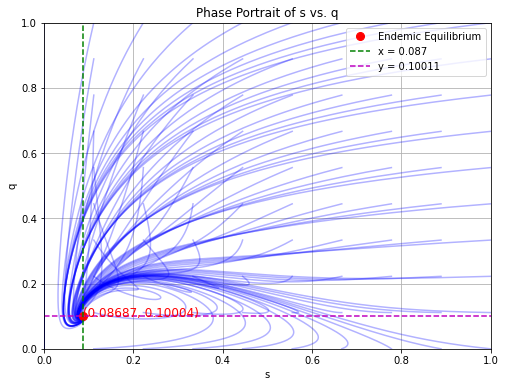

In [64]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the "smoking" model equations
def smoking(state, t, beta, mu, alpha, sigma, gamma, p):
    s, q, a = state
    dsdt = beta * s * (1 - s - q - a) - alpha * s * a + sigma * q * s - mu * s
    dqdt = alpha * s * a - sigma * q * s - gamma * q - mu * q
    dadt = mu * p - mu * a + gamma * q
    return [dsdt, dqdt, dadt]

# Constants
mu = 0.12
alpha = 0.5
sigma = 0.01
gamma = 0.042
p = 0.34
beta = 0.7

# Create a grid of initial conditions for s and q
s_values = np.linspace(0, 1, 10)
q_values = np.linspace(0, 1, 10)
initial_conditions = [(s, q) for s in s_values for q in q_values]

# Time span for integration
t = np.linspace(0, 100, 1000)

# Function to find the endemic equilibrium using odeint
def find_endemic_equilibrium(initial_guess):
    state = odeint(smoking, initial_guess, t, args=(beta, mu, alpha, sigma, gamma, p))
    s_eq = state[-1, 0]
    q_eq = state[-1, 1]
    a_eq = state[-1, 2]
    return s_eq, q_eq, a_eq

initial_guess = [0.5, 0.1, 0.1]  # Initial guess for s, q, and a
s_eq, q_eq, a_eq = find_endemic_equilibrium(initial_guess)

# Create the phase portrait using odeint
plt.figure(figsize=(8, 6))

for initial_condition in initial_conditions:
    result = odeint(smoking, initial_condition + (0.05,), t, args=(beta, mu, alpha, sigma, gamma, p))
    s_values = result[:, 0]
    q_values = result[:, 1]
    plt.plot(s_values, q_values, 'b-', alpha=0.3)

# Mark the endemic equilibrium and label its value
plt.plot(s_eq, q_eq, 'ro', markersize=8, label='Endemic Equilibrium')
plt.text(s_eq, q_eq, f'({s_eq:.5f}, {q_eq:.5f})', fontsize=12, color='r')

# Add vertical and horizontal lines
plt.axvline(x=0.087, color='g', linestyle='--', label='x = 0.087')
plt.axhline(y=0.10011, color='m', linestyle='--', label='y = 0.10011')

# Customize the plot
plt.xlabel('s')
plt.ylabel('q')
plt.title('Phase Portrait of s vs. q')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.show()

### 9b). q(t) vs a(t) Phase portrait.

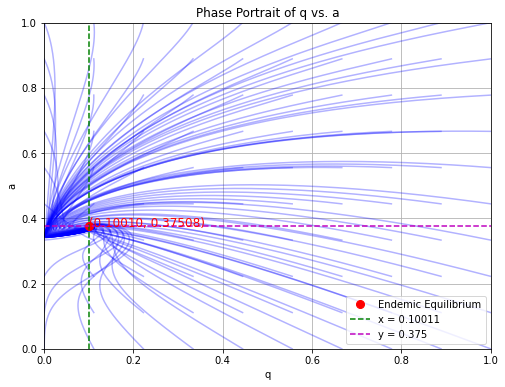

In [58]:
mu = 0.12
alpha = 0.5
sigma = 0.01
gamma = 0.042
p = 0.34
beta = 0.7

# Create a grid of initial conditions for q and a
q_values = np.linspace(0, 1, 10)
a_values = np.linspace(0, 1, 10)
initial_conditions = [(q, a) for q in q_values for a in a_values]

# Time span for integration
t = np.linspace(0, 100, 1000)

# Function to find the endemic equilibrium using odeint
def find_endemic_equilibrium(initial_guess):
    state = odeint(smoking, (0.05, initial_guess[0], initial_guess[1]), t, args=(beta, mu, alpha, sigma, gamma, p))
    q_eq = state[-1, 1]
    a_eq = state[-1, 2]
    return q_eq, a_eq

initial_guess = [0.1, 0.1]  # Initial guess for q and a
q_eq, a_eq = find_endemic_equilibrium(initial_guess)

# Create the phase portrait using odeint
plt.figure(figsize=(8, 6))

for initial_condition in initial_conditions:
    result = odeint(smoking, (0.05, initial_condition[0], initial_condition[1]), t, args=(beta, mu, alpha, sigma, gamma, p))
    q_values = result[:, 1]
    a_values = result[:, 2]
    plt.plot(q_values, a_values, 'b-', alpha=0.3)

# Mark the endemic equilibrium and label its value
plt.plot(q_eq, a_eq, 'ro', markersize=8, label='Endemic Equilibrium')
plt.text(q_eq, a_eq, f'({q_eq:.5f}, {a_eq:.5f})', fontsize=12, color='r')

plt.axvline(x=0.10011, color='g', linestyle='--', label='x = 0.10011')
plt.axhline(y=0.375, color='m', linestyle='--', label='y = 0.375')


# Customize the plot
plt.xlabel('q')
plt.ylabel('a')
plt.title('Phase Portrait of q vs. a')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.show()

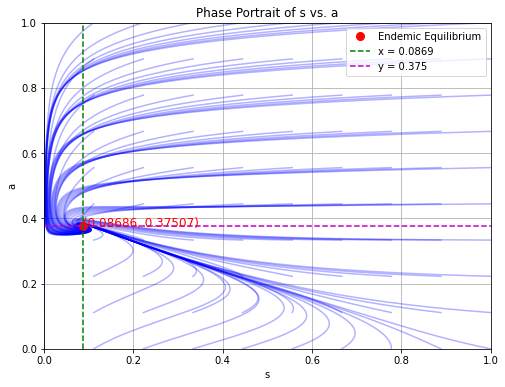

In [63]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the "smoking" model equations
def smoking(state, t, beta, mu, alpha, sigma, gamma, p):
    s, q, a = state
    dsdt = beta * s * (1 - s - q - a) - alpha * s * a + sigma * q * s - mu * s
    dqdt = alpha * s * a - sigma * q * s - gamma * q - mu * q
    dadt = mu * p - mu * a + gamma * q
    return [dsdt, dqdt, dadt]

# Constants
mu = 0.12
alpha = 0.5
sigma = 0.01
gamma = 0.042
p = 0.34
beta = 0.7

# Create a grid of initial conditions for s and a
s_values = np.linspace(0, 1, 10)
a_values = np.linspace(0, 1, 10)
initial_conditions = [(s, a) for s in s_values for a in a_values]

# Time span for integration
t = np.linspace(0, 100, 1000)

# Function to find the endemic equilibrium using odeint
def find_endemic_equilibrium(initial_guess):
    state = odeint(smoking, (initial_guess[0], 0.05, initial_guess[1]), t, args=(beta, mu, alpha, sigma, gamma, p))
    s_eq = state[-1, 0]
    a_eq = state[-1, 2]
    return s_eq, a_eq

initial_guess = [0.1, 0.1]  # Initial guess for s and a
s_eq, a_eq = find_endemic_equilibrium(initial_guess)

# Create the phase portrait using odeint
plt.figure(figsize=(8, 6))

for initial_condition in initial_conditions:
    result = odeint(smoking, (initial_condition[0], 0.05, initial_condition[1]), t, args=(beta, mu, alpha, sigma, gamma, p))
    s_values = result[:, 0]
    a_values = result[:, 2]
    plt.plot(s_values, a_values, 'b-', alpha=0.3)

# Mark the endemic equilibrium and label its value
plt.plot(s_eq, a_eq, 'ro', markersize=8, label='Endemic Equilibrium')
plt.text(s_eq, a_eq, f'({s_eq:.5f}, {a_eq:.5f})', fontsize=12, color='r')

plt.axvline(x=0.0869, color='g', linestyle='--', label='x = 0.0869')
plt.axhline(y=0.375, color='m', linestyle='--', label='y = 0.375')

# Customize the plot
plt.xlabel('s')
plt.ylabel('a')
plt.title('Phase Portrait of s vs. a')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.show()